In [8]:
!wget https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall19/week03_convnets/cifar.py

--2020-03-04 13:44:20--  https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall19/week03_convnets/cifar.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2396 (2.3K) [text/plain]
Saving to: ‘cifar.py.1’

cifar.py.1          100%[===================>]   2.34K  --.-KB/s    in 0s      

2020-03-04 13:44:21 (59.9 MB/s) - ‘cifar.py.1’ saved [2396/2396]



In [ ]:
import time

import numpy as np
import matplotlib.pyplot as plt

from cifar import load_cifar10

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms

In [ ]:
BATCH_SIZE = 128

In [ ]:
transform_train = transforms.Compose([
   transforms.ToTensor(),
   transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])
trainset = torchvision.datasets.CIFAR10(root='cifar_data/', train=True, download=False,
                                        transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

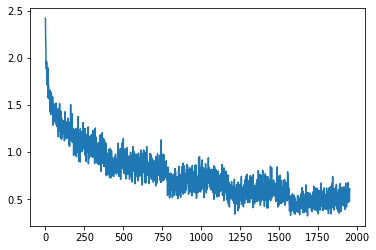

In [49]:
plt.plot(history)
plt.show()

In [ ]:
testset = torchvision.datasets.CIFAR10(root='cifar_data/', train=False, download=False,
                                        transform=transform_train)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

In [56]:
len(testloader)

100

In [58]:
model.train(False)

test_batch_acc = []
test_logits = np.zeros((len(testset), 10))
test_true = np.zeros((len(testset), 1))

for i, (x_batch, y_batch) in enumerate(testloader):
    logits = model(x_batch)

    # write to val_logits
    test_logits[i * 100: (i + 1) * 100, :] = logits.data.numpy()

    # write to  answers
    test_true[i * 100: (i + 1) * 100, 0] = y_batch.data.numpy()

    y_pred = logits.max(1)[1].data.numpy()
    test_batch_acc.append(np.mean(y_batch.data.numpy() == y_pred))
    
print('Accuracy on validation {}'.format(np.mean(test_batch_acc)))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy on validation 0.7355000000000002


In [ ]:
np.savez('model1', test_logits, test_true)

In [ ]:
saved = np.load('model1.npz')

saved_logits = saved['arr_0']
saved_true = saved['arr_1']